In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
import seaborn as sns

# from astrometry.libkd.spherematch import match_radec
from fits import tractor_cat
import psql
import targets
import plots

 # PTF timing on BB

In [88]:
def hms2s(hms_list):
        new_list=[]
        for hms in hms_list:
            temp=np.array(hms.split(':')).astype(int)
            new_list.append( temp[0]*3600+temp[1]*60+temp[2] )
        return np.array(new_list).astype(int)    

class Timing(object):
    def __init__(self,fn):
        self.cores,self.wh,self.nptf=np.loadtxt(fn,dtype=int,usecols=(1,2,3),unpack=True)
        self.disk=np.loadtxt(fn,dtype=str,usecols=(0,),unpack=True)
        start,end=np.loadtxt(fn,dtype=str,usecols=(4,5),unpack=True)
        start,end= hms2s(start),hms2s(end)
        self.runtime= end-start
    def scaling(self,x1,y1,xvals):
        '''y \propto 1/x'''
        x2,y2= 2.*x1,y1/2.
        coeff= (y2-y1)/(1./x2-1./x1)
        inter= y1-coeff/x1
        return coeff/xvals +inter
    





In [15]:
[x for x in dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'b']

In [26]:
c.a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
class Hello(object):
    def __init__(self):
        self.a=np.arange(10)
        self.b=np.arange(10)
    def _ats(self):
        at_list= []
        for i in dir(self):
            print 'i=',i,'type(i)=',type(i)
            if i.startswith('_') == False: at_list.append(i)
        return at_list
c=Hello()
c._ats()

i= __class__ type(i)= <type 'str'>
i= __delattr__ type(i)= <type 'str'>
i= __dict__ type(i)= <type 'str'>
i= __doc__ type(i)= <type 'str'>
i= __format__ type(i)= <type 'str'>
i= __getattribute__ type(i)= <type 'str'>
i= __hash__ type(i)= <type 'str'>
i= __init__ type(i)= <type 'str'>
i= __module__ type(i)= <type 'str'>
i= __new__ type(i)= <type 'str'>
i= __reduce__ type(i)= <type 'str'>
i= __reduce_ex__ type(i)= <type 'str'>
i= __repr__ type(i)= <type 'str'>
i= __setattr__ type(i)= <type 'str'>
i= __sizeof__ type(i)= <type 'str'>
i= __str__ type(i)= <type 'str'>
i= __subclasshook__ type(i)= <type 'str'>
i= __weakref__ type(i)= <type 'str'>
i= _ats type(i)= <type 'str'>
i= a type(i)= <type 'str'>
i= b type(i)= <type 'str'>


['a', 'b']

4


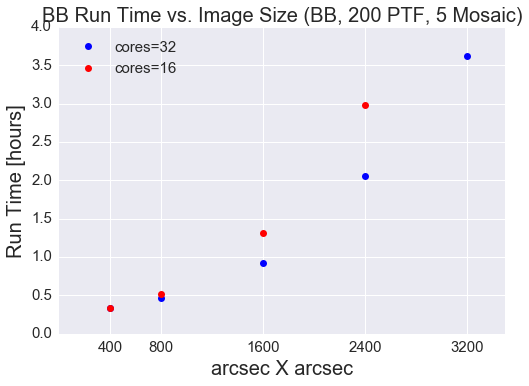

In [104]:
#varyWH
i_32= np.all((tim.disk == 'BB',tim.cores == 32,tim.nptf == 200),axis=0)
i_16= np.all((tim.disk == 'BB',tim.cores == 16,tim.nptf == 200),axis=0)
print tim.disk[i_16].shape[0]
assert(np.all((tim.disk[i_32].shape[0] == 5,tim.disk[i_16].shape[0] == 4),axis=0))
lab_args=dict(fontsize=20)
leg_args=dict(fontsize=15)
tick_args=dict(labelsize=15)
fig,ax=plt.subplots()
ax.plot(tim.wh[i_32],tim.runtime[i_32]/3600.,'bo',label='cores=32')
ax.plot(tim.wh[i_16],tim.runtime[i_16]/3600.,'ro',label='cores=16')
ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.set_xticks(tim.wh[i_32])
#xvals=np.linspace(1,70)
#x1,y1=bb.cores[0],bb.runtime[0]/3600.
#ax.plot(xvals,bb.scaling(x1,y1,xvals),'k--',label=r'BB Time $\propto$ 1/Cores')
ax.set_title("BB Run Time vs. Image Size (200 PTF, 5 Mosaic)",**lab_args)
ax.set_xlabel('arcsec X arcsec',**lab_args)
ax.set_ylabel('Run Time [hours]',**lab_args)
ax.legend(loc=0,**leg_args)
ax.tick_params(axis='both', which='major', **tick_args)
# plt.savefig('tractor_timing.png',dpi=100)

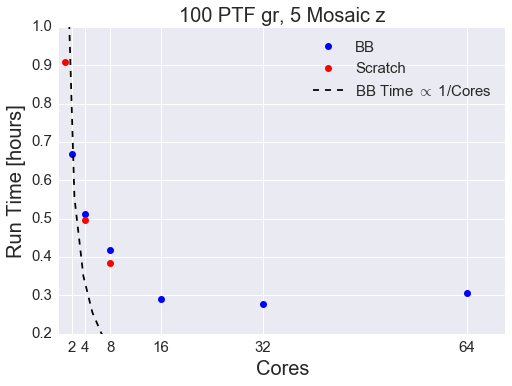

In [80]:
bb=Timing('timing_bb.txt')
scr=Timing('timing_scratch.txt')
#
lab_args=dict(fontsize=20)
leg_args=dict(fontsize=15)
tick_args=dict(labelsize=15)
fig,ax=plt.subplots()
ax.plot(bb.cores,bb.runtime/3600.,'bo',label='BB')
ax.plot(scr.cores,scr.runtime/3600.,'ro',label='Scratch')
ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.set_xticks(x)
xvals=np.linspace(1,70)
x1,y1=bb.cores[0],bb.runtime[0]/3600.
ax.plot(xvals,bb.scaling(x1,y1,xvals),'k--',label=r'BB Time $\propto$ 1/Cores')
ax.set_title("100 PTF gr, 5 Mosaic z",**lab_args)
ax.set_xlabel('Cores',**lab_args)
ax.set_ylabel('Run Time [hours]',**lab_args)
ax.legend(loc=0,**leg_args)
ax.tick_params(axis='both', which='major', **tick_args)
plt.savefig('tractor_timing.png',dpi=100)

 # Fake Image unit test

In [3]:
cat=tractor_cat('../tractor_cat_ptf/100g100R/tractor-custom-150385p02200.fits')

In [10]:
cat['ra'].min(),cat['ra'].max(),np.around?

In [ ]:
cat['ra'].min(),cat['ra'].max(),np.around

In [19]:
pwd

u'/Users/kburleigh/PhdStudent/Research/peter/thesis_code'

In [24]:
def deg_to_arcsec(deg):
    return deg*3600.
pixscale=1.
npix_ra= deg_to_arcsec(cat['ra'].max()-cat['ra'].min())/pixscale
npix_ra= int(npix_ra+1)
npix_dec= deg_to_arcsec(cat['dec'].max()-cat['dec'].min())/pixscale
npix_dec= int(npix_dec+1)
img= np.zeros((npix_ra,npix_dec))


(504, 502)

In [28]:
def sersic(r,I0=10.,re=10,n=4,vn=7.66925):
    return I0*np.exp(-vn*(r/re)**(1./n))

def dev(r):
    return sersic(r)



array([ 0.5  ,  0.525,  0.55 ,  0.575,  0.6  ])

In [6]:
from PIL import Image

In [7]:
Image.open?

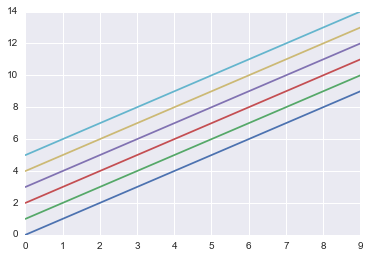

In [5]:
sns.color_palette('dark')
for i in range(6): plt.plot(np.arange(10)+i)

In [17]:
cat['shapeexp_r'][0],cat['shapeexp_e1'][0],cat['shapeexp_e2'][0],cat['fracdev'][0]

(0.0, 0.0, 0.0, 0.0)

In [48]:
class Grid(object):
    def __init__(self,ramin,ramax,decmin,decmax,pixscale):
        self.npix_ra= int(deg_to_arcsec(ramax-ramin)/pixscale + 1)
        self.npix_dec= int(deg_to_arcsec(decmax-decmin)/pixscale + 1)
        self.ra_centers= np.linspace(ramin,ramax,num=self.npix_ra)
        self.dec_centers= np.linspace(decmin,decmax,num=self.npix_dec)
        self.img= np.zeros((self.npix_ra,self.npix_dec))
    def nearest_pix(self,ra,dec):
        '''return x,y index for img of nearest ra,dec pixel center to ra,dec'''
        return np.argsort(np.abs(self.ra_centers-ra))[0], np.argsort(np.abs(self.dec_centers-dec))[0]
    def fill_img(self,ra,dec):
        i,j= self.nearest_pix(ra,dec)
        self.img[i,j]+= 1
# def unit_test():
# grid= Grid(0.5,0.6,0.,0.1,50.)
# i,j= grid.nearest_pix(0.58,0.091)
# print grid.ra_centers, grid.ra_centers[i]
# print grid.dec_centers, grid.dec_centers[j]

In [49]:
pixscale=1.
grid= Grid(cat['ra'].min(),cat['ra'].max(),cat['dec'].min(),cat['dec'].max(),pixscale)
for ra,dec in zip(cat['ra'],cat['dec']): grid.fill_img(ra,dec)


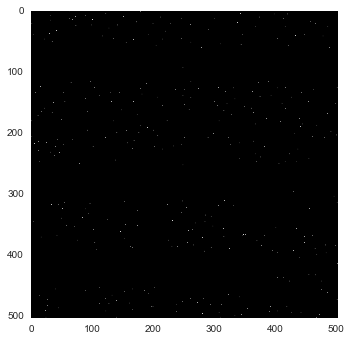

In [53]:
plt.imshow(grid.img,cmap='gray')
plt.grid(False)
# plt.imshow?

In [3]:
import numpy as np
import os
a=np.arange(10)
b=np.arange(10)
print a < 5
print b > 3
print np.logical_and(a < 5,b>3)
a='../8.png'
os.path.dirname(a),os.path.basename(a)

[ True  True  True  True  True False False False False False]
[False False False False  True  True  True  True  True  True]
[False False False False  True False False False False False]


('..', '8.png')

In [72]:
a.keys()

AttributeError: 'float' object has no attribute 'keys'

In [71]:
len(range(11,22))

11

# matched DR2 vs. PTF

In [9]:
from psql import load_ofile

In [7]:
np.loadtxt?

In [54]:
reload(psql)
reload(targets)


#exactly 1 match
m1={}
fn= 'data/deep2f3/decam_with_single_bokmos_matches.txt'
str_kws=['type']
decam= psql.load_ofile(fn,range(14),str_kws=str_kws)
bokmos= psql.load_ofile(fn,range(14,28),str_kws=str_kws)
m1['decam']= targets.DECaLS(decam, w1=True)
m1['bokmos']= targets.DECaLS(bokmos, w1=True)
for key in ['ra','dec']: assert( (m1['decam'].data[key] - m1['bokmos'].data[key]).max() < 1e-3)
#exactly 1 match
m2={}
fn= 'data/deep2f3/bokmos_with_single_decam_matches.txt'
bokmos= psql.load_ofile(fn,range(14),str_kws=str_kws)
decam= psql.load_ofile(fn,range(14,28),str_kws=str_kws)
# assert( (dr2['dec'] - ptf['dec']).max() < 1e-3)
m2['decam']= targets.DECaLS(decam, w1=True)
m2['bokmos']= targets.DECaLS(bokmos, w1=True)
for key in ['ra','dec']: assert( (m2['decam'].data[key] - m2['bokmos'].data[key]).max() < 1e-3)
#no matches
unm={}
fn= 'data/deep2f3/decam_wout_match_in_bokmos.txt'
decam= psql.load_ofile(fn,range(14),str_kws=str_kws)
fn= 'data/deep2f3/bokmos_wout_match_in_decam.txt'
bokmos= psql.load_ofile(fn,range(14),str_kws=str_kws)
# assert( (dr2['dec'] - ptf['dec']).max() < 1e-3)
unm['decam']= targets.DECaLS(decam, w1=True)
unm['bokmos']= targets.DECaLS(bokmos, w1=True)

getcols=  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
getcols=  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
getcols=  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
getcols=  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
getcols=  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
getcols=  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [31]:
m1['decam'].data['w1flux'][0],m1['decam'].data['w1flux'][-1]


(2.11724, 5.1428699)

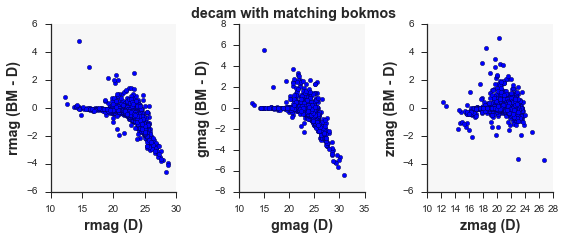

In [35]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    diff= m1['bokmos'].data[val]- m1['decam'].data[val]
    ax[cnt].scatter(m1['decam'].data[val], diff)
    xlab=ax[cnt].set_xlabel('%s (D)' % val, **laba)
    ylab=ax[cnt].set_ylabel('%s (BM - D)' % val, **laba)
plt.suptitle('decam with matching bokmos',**laba)
#save
sns.despine()
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


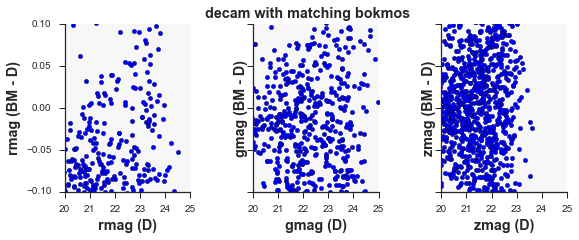

In [37]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    diff= m1['bokmos'].data[val]- m1['decam'].data[val]
    ax[cnt].scatter(m1['decam'].data[val], diff)
    ax[cnt].set_ylim(-0.1,0.1)
    ax[cnt].set_xlim(20,25)
    xlab=ax[cnt].set_xlabel('%s (D)' % val, **laba)
    ylab=ax[cnt].set_ylabel('%s (BM - D)' % val, **laba)
plt.suptitle('decam with matching bokmos',**laba)
#save
sns.despine()
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


In [59]:
# dr2_types=np.array(['PSF']*100)
# ptf_types=np.array(['PSF']*100)
# nums=np.arange(100,dtype=int)
# for cnt,gals in enumerate(['SIMP','EXP','DEVAC','COMP']):
#     np.random.shuffle(nums)
#     dr2_types[nums[:25]]=gals
#     np.random.shuffle(nums)
#     ptf_types[nums[:25]]=gals

In [38]:
set(m1['decam'].data['type'])

{' COM', ' DEV', ' EXP', ' PSF', ' SIM'}

In [51]:
ht=np.zeros(7)-1
for cnt, gals in enumerate([' PSF',' SIM',' EXP',' DEV ',' COM']):
    i_decam= m1['decam'].data['type'] == gals
    i_bokmos= m1['bokmos'].data['type'] == gals
    ndec,nbm= np.where(i_decam)[0].shape[0],np.where(i_bokmos)[0].shape[0]
    if ndec == 0 or nbm == 0: ht[cnt]=0
    else: ht[cnt]=float(nbm)/ndec
    print ht
ht[-2]=0
ht[-1]= float(2524)/6358#total number sources from db

[ 0.87387387 -1.         -1.         -1.         -1.         -1.         -1.        ]
[ 0.87387387  0.55259976 -1.         -1.         -1.         -1.         -1.        ]
[ 0.87387387  0.55259976  2.04600484 -1.         -1.         -1.         -1.        ]
[ 0.87387387  0.55259976  2.04600484  0.         -1.         -1.         -1.        ]
[ 0.87387387  0.55259976  2.04600484  0.          0.5        -1.         -1.        ]


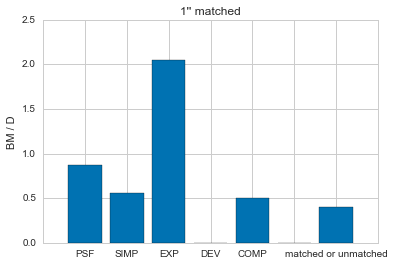

In [52]:
sns.set_style("whitegrid")
#setup plot
laba=dict(fontweight='bold',fontsize='xx-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots()
#plot
ax.bar(range(7),ht,align='center')
ax.set_xticklabels(['']+['PSF','SIMP','EXP','DEV','COMP','','matched or unmatched']+[''])
ax.set_ylabel("BM / D")
ax.set_title("1'' matched")
#save
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [56]:
set(unm['decam'].data['type'])

{' COM', ' DEV', ' EXP', ' PSF', ' SIM'}

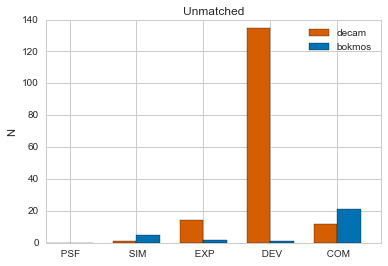

In [59]:
sns.set_style("whitegrid")
sns.set_palette('colorblind')
c1=sns.color_palette()[2] 
c2=sns.color_palette()[0] #'b'
###
types=[' PSF',' SIM',' EXP',' DEV',' COM']
ind = np.arange(len(types))  # the x locations for the groups
width = 0.35       # the width of the bars
###
ht_decam, ht_bokmos= np.zeros(5,dtype=int),np.zeros(5,dtype=int)
for cnt,typ in enumerate(types):
    ht_decam[cnt]= np.where(unm['decam'].data['type'] == typ)[0][0]
    ht_bokmos[cnt]= np.where(unm['bokmos'].data['type'] == typ)[0][0]
###
fig, ax = plt.subplots()
rects1 = ax.bar(ind, ht_decam, width, color=c1)
rects2 = ax.bar(ind + width, ht_bokmos, width, color=c2)
ax.set_ylabel("N")
ax.set_title('Unmatched')
ax.set_xticks(ind + width)
ax.set_xticklabels(types)
ax.legend((rects1[0], rects2[0]), ('decam', 'bokmos'))
#save
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


In [1]:
sns.color_palette('dark')

NameError: name 'sns' is not defined

In [127]:
a=np.arange(-5,10)
b=np.log10(a)
print np.isnan(b)
print np.isinf(b)
m=np.ma.masked_array(b, mask=np.any((np.isnan(b),np.isinf(b)),axis=0))
print m.mask
k=np.sqrt(m)
k.mask

[ True  True  True  True  True False False False False False False False
 False False False]
[False False False False False  True False False False False False False
 False False False]
[ True  True  True  True  True  True False False False False False False
 False False False]


array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [111]:
i_lrg= range(len(m1['decam'].data[band+'mag'])/2)
for band in ['g','r','z']:
    a=m1['decam'].data[band+'mag'][i_lrg]
    # np.where(a == np.nan)
    # plt.hist(a,range=(10,))
    ind=[]
    for i in range(len(a)): 
        if np.isnan(a[i]): ind.append(i)
    print 'band=%s, %d nans' % (band,len(ind))

band=g, 28 nans
band=r, 1 nans
band=z, 0 nans


(array([   5.,    9.,   26.,   53.,  123.,  299.,  627.,  979.,  185.,    4.]),
 array([ 12.72036266,  13.98417006,  15.24797745,  16.51178484,
         17.77559223,  19.03939962,  20.30320702,  21.56701441,
         22.8308218 ,  24.09462919,  25.35843658]),
 <a list of 10 Patch objects>)

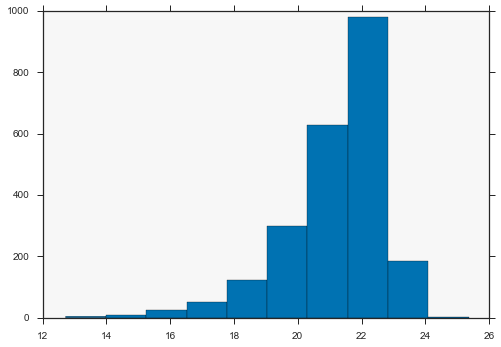

In [115]:
plt.hist(gs)

In [64]:
float(len(np.where(m1['decam'].data['i_lrg'])[0]))/len(m1['decam'].data['type'])

0.012537829658452227

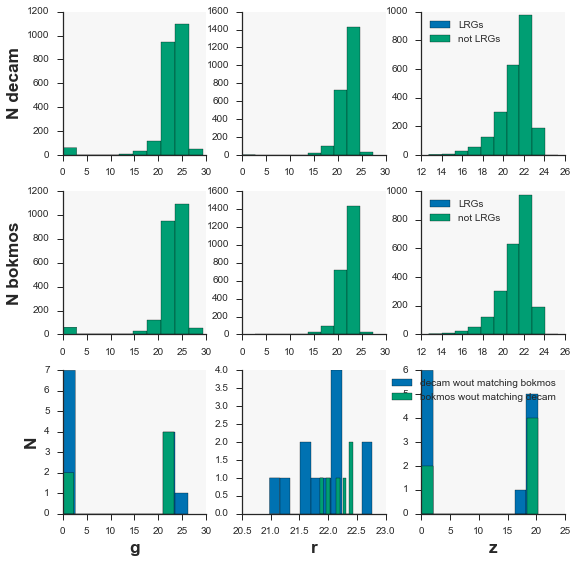

In [65]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='xx-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(3,3,figsize=(9,9))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
#plot
for row in range(3):
    for col,band in zip(range(3),['g','r','z']):
        if row == 0: 
            cam='decam'
            i_lrg= m1[cam].data['i_lrg']
            ax[row,col].hist(m1[cam].data[band+'mag'][i_lrg],label='LRGs')
            i_other= list(set(range(m1[dat].data[band+'mag'].shape[0])) - set(i_lrg))
            ax[row,col].hist(m1[dat].data[band+'mag'][i_other],label='not LRGs')
        if row == 1: 
            cam='bokmos'
            i_lrg= m1[cam].data['i_lrg']
            ax[row,col].hist(m1[dat].data[band+'mag'][i_lrg],label='LRGs')
            i_other= list(set(range(m1[dat].data[band+'mag'].shape[0])) - set(i_lrg))
            ax[row,col].hist(m1[dat].data[band+'mag'][i_other],label='not LRGs')
        if row == 2: 
            cam='decam'
            i_lrg= unm[cam].data['i_lrg']
            ax[row,col].hist(unm[cam].data[band+'mag'][i_lrg],label='decam wout matching bokmos')
            cam='bokmos'
            i_lrg= unm[cam].data['i_lrg']
            ax[row,col].hist(unm['bokmos'].data[band+'mag'][i_lrg],label='bokmos wout matching decam')
for i,band,ylabel in zip(range(3),['g','r','z'],['N decam','N bokmos','N']): 
    xlab=ax[2,i].set_xlabel(band,**laba)
    ylab=ax[i,0].set_ylabel(ylabel,**laba)
    ax[i,2].legend(loc=0)
#save
sns.despine()
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [68]:
a=np.nan
np.isnan(a)

True

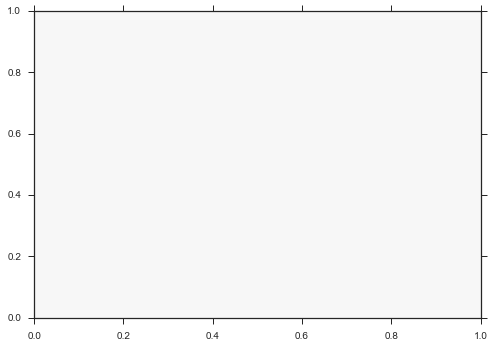

In [61]:
fig,ax=plt.subplots()
ax.tick_params
plt.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom='off',      # ticks along the bottom edge are off
top='off',         # ticks along the top edge are off
labelbottom='off') 

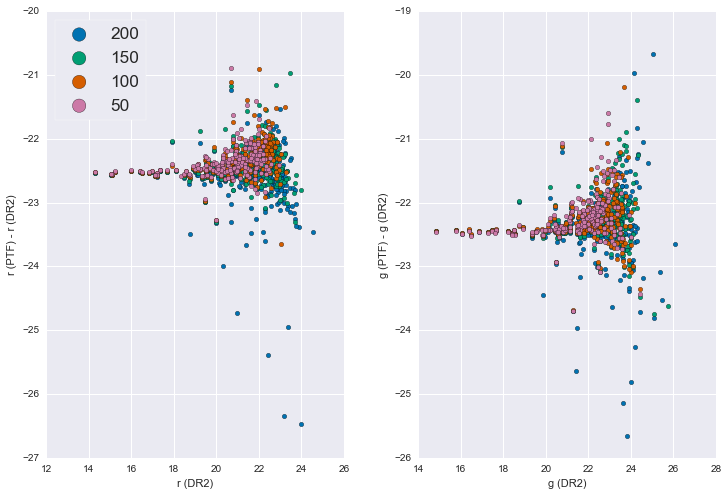

In [99]:
reload(plots)
colors= plots.get_seaborn_colors()
#plot
fig,axes=plt.subplots(1,2,figsize=(12,8))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.1,wspace=0.25)
#add pts
for cnt,key in enumerate(['p200','p150','p100','p50']):
    diff= a[key]['PTF'].data['rmag']- a[key]['DR2'].data['rmag']
    ax[0].scatter(a[key]['DR2'].data['rmag'], diff,c=colors[cnt],label=key[1:])
    diff= a[key]['PTF'].data['gmag']- a[key]['DR2'].data['gmag']
    ax[1].scatter(a[key]['DR2'].data['gmag'], diff,c=colors[cnt])
#
ax[0].legend(loc=2,fontsize='xx-large',markerscale=3,frameon=True)
for cnt,band in enumerate(['r','g']):
    ax[cnt].set_ylabel('%s (PTF) - %s (DR2)' % (band,band))
    ax[cnt].set_xlabel('%s (DR2)' %(band,))
plt.savefig('./dr2_v_ptf.png',dpi=200)




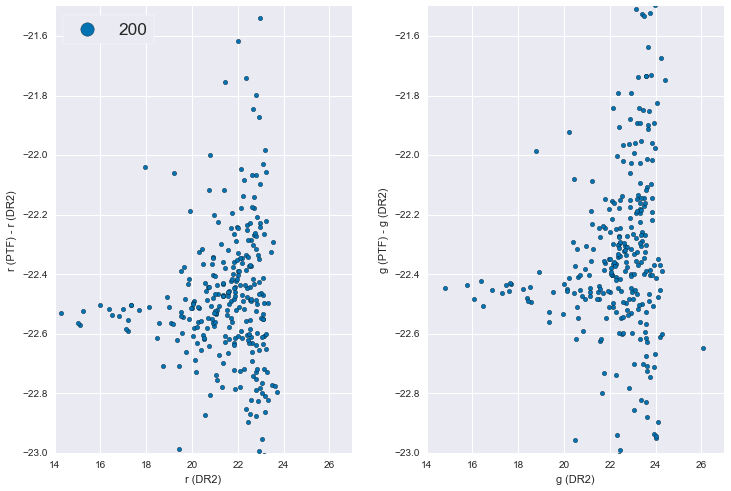

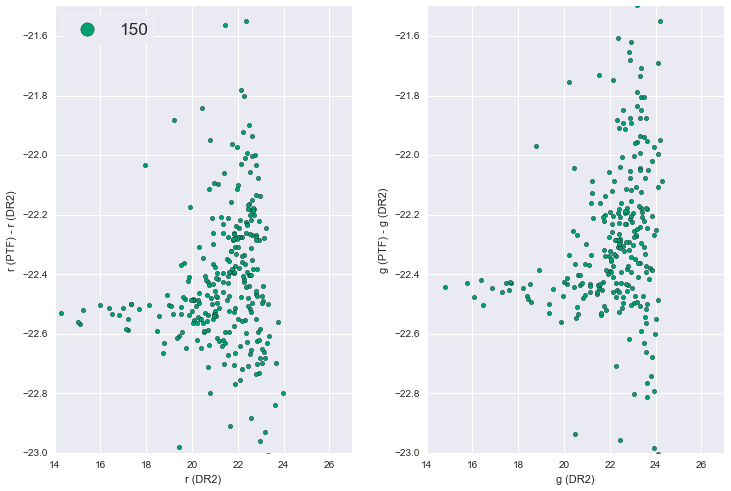

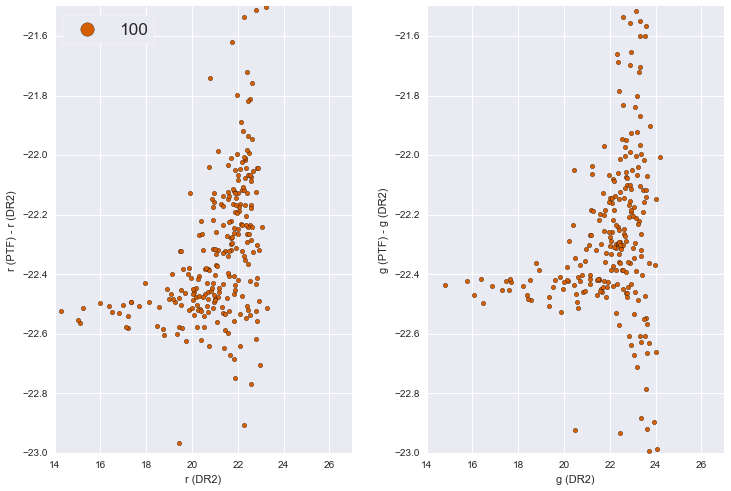

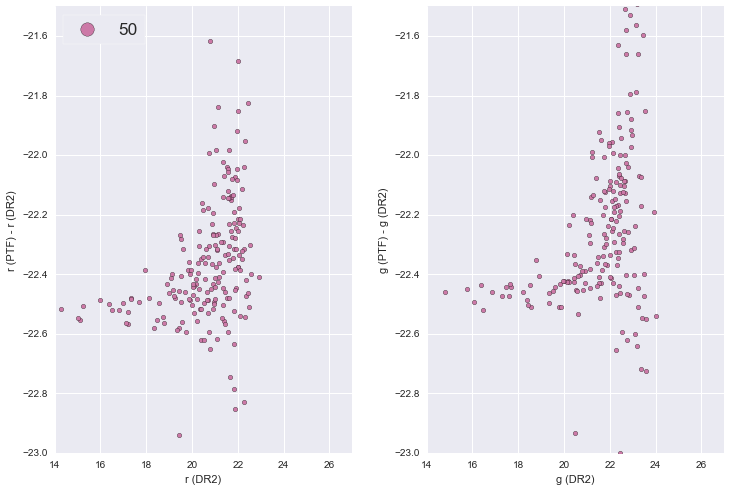

In [102]:
reload(plots)
colors= plots.get_seaborn_colors()
#plot
for cnt,key in enumerate(['p200','p150','p100','p50']):
    fig,axes=plt.subplots(1,2,figsize=(12,8))
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.25)
    #add pts
    diff= a[key]['PTF'].data['rmag']- a[key]['DR2'].data['rmag']
    ax[0].scatter(a[key]['DR2'].data['rmag'], diff,c=colors[cnt],label=key[1:])
    diff= a[key]['PTF'].data['gmag']- a[key]['DR2'].data['gmag']
    ax[1].scatter(a[key]['DR2'].data['gmag'], diff,c=colors[cnt])
    #
    ax[0].legend(loc=2,fontsize='xx-large',markerscale=3,frameon=True)
    for cnt,band in enumerate(['r','g']):
        ax[cnt].set_ylabel('%s (PTF) - %s (DR2)' % (band,band))
        ax[cnt].set_xlabel('%s (DR2)' %(band,))
        ax[cnt].set_xlim(14,27)
        ax[cnt].set_ylim(-23,-21.5)
    plt.savefig('./dr2_v_ptf_%s_zoom.png' % key[1:],dpi=200)

In [41]:
np.where(ptf['rflux'] < 0)

(array([], dtype=int64),)

# PTF 50-200 comparisons 

In [6]:
d={}
d50= tractor_cat('../tractor_cat_ptf/25g25R/tractor-custom-150385p02200.fits')
d100= tractor_cat('../tractor_cat_ptf/50g50R/tractor-custom-150385p02200.fits')
d150= tractor_cat('../tractor_cat_ptf/75g75R/tractor-custom-150385p02200.fits')
d200= tractor_cat('../tractor_cat_ptf/100g100R/tractor-custom-150385p02200.fits')
print d50.keys()
g,r= 1,2

['bx', 'shapeexp_r_ivar', 'tycho2inblob', 'decam_psfsize', 'ebv', 'shapeexp_e1_ivar', 'decam_apflux_ivar', 'shapeexp_r', 'decam_flux_ivar', 'shapeexp_e2_ivar', 'decam_fracflux', 'bx0', 'fracdev', 'out_of_bounds', 'decam_allmask', 'brick_primary', 'decam_apflux', 'ninblob', 'shapeexp_e1', 'type', 'decam_flux', 'decam_rchi2', 'blob', 'brickname', 'decam_apflux_resid', 'shapeexp_e2', 'shapedev_e2', 'shapedev_e1', 'decam_fracin', 'ra', 'left_blob', 'decam_nobs', 'objid', 'shapedev_r_ivar', 'decam_anymask', 'by', 'brickid', 'shapedev_e1_ivar', 'shapedev_r', 'fracdev_ivar', 'ra_ivar', 'by0', 'dchisq', 'decam_mw_transmission', 'dec', 'shapedev_e2_ivar', 'decam_fracmasked', 'dec_ivar']


In [7]:
def ptf_mag(data):
    g,r= 1,2
    ind= np.all((data['decam_flux'][:,g] > 0,data['decam_flux'][:,r] > 0),axis=0)
    data['gmag']= -2.5*np.log10(data['decam_flux'][:,g][ind])
    data['rmag']= -2.5*np.log10(data['decam_flux'][:,r][ind])

In [8]:
# data['decam_flux'][0,g]
ptf_mag(d50)
ptf_mag(d100)
ptf_mag(d150)
ptf_mag(d200)

In [54]:
set(d200['type'])

{'COMP', 'DEV ', 'EXP ', 'PSF ', 'SIMP'}

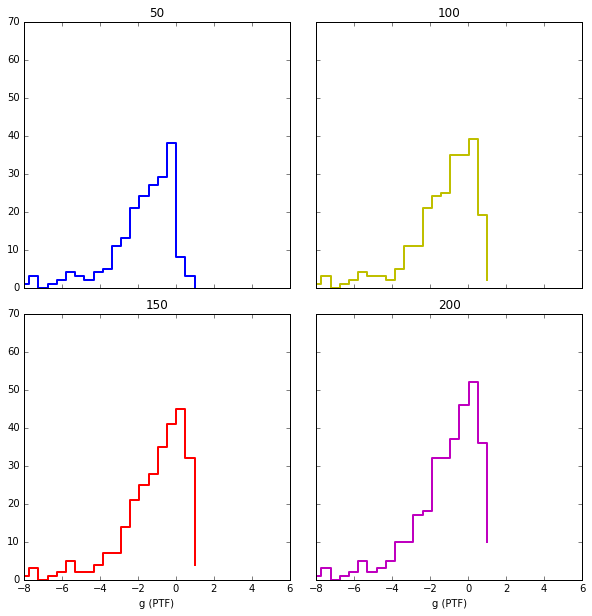

In [11]:
#N per band
for band in ['g','r']:
    h={}
    key='%smag' % band
    h['d200']= plt.hist(d200[key],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
    plt.savefig('./n_%sband.png' % band)
#     plt.close()

In [14]:
#N per TYPE
for typ in list(set(d50['type'])):
    h={}
    key='%smag' % typ
    h['d200']= plt.hist(d200[],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
#     plt.savefig('./n_%sband.png' % band)
#     plt.close()

KeyError: 'PSF mag'

In [65]:
d200['type']

array(['PSF ', 'EXP ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ',
       'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'EXP ', 'SIMP', 'PSF ', 'DEV ', 'PSF ', 'PSF ', 'PSF ', 'SIMP',
       'DEV ', 'PSF ', 'DEV ', 'DEV ', 'SIMP', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'COMP', 'PSF ', 'SIMP', 'PSF ', 'EXP ', 'PSF ', 'SIMP',
       'PSF ', 'PSF ', 'PSF ', 'PSF ', 'EXP ', 'EXP ', 'EXP ', 'PSF ',
       'SIMP', 'EXP ', 'PSF ', 'SIMP', 'SIMP', 'DEV ', 'SIMP', 'EXP ',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'SIMP', 'PSF ', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP', 'SIMP', 'PSF ',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP',
      

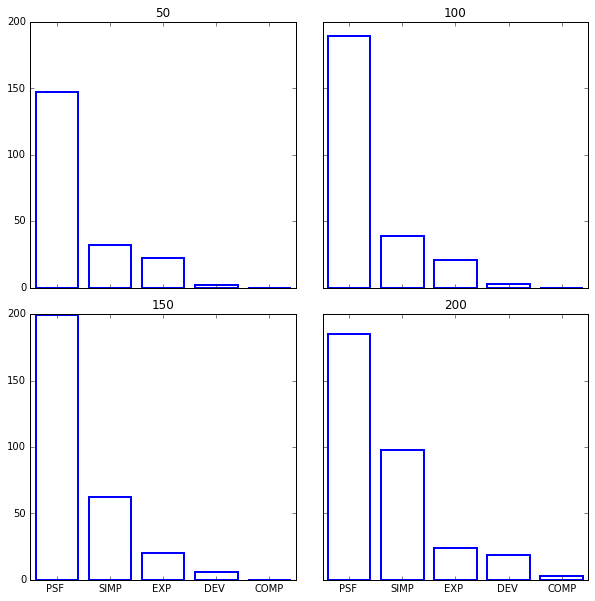

In [13]:
testNames= ['PSF ','SIMP','EXP ','DEV ','COMP'] #list(set(d200['type']))
pos = np.arange(len(testNames)) + 0.5
fig,axes=plt.subplots(2,2,figsize=(10,10)) #,sharex=True,sharey=True)
ax=axes.flatten()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
ax[0].bar(pos, [(d50['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[1].bar(pos, [(d100['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[2].bar(pos, [(d150['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
ax[3].bar(pos, [(d200['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
for i in [1,3]: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
for i in range(4): ax[i].set_ylim(0,200)
for cnt,title in enumerate(['50','100','150','200']): ax[cnt].set_title(title)
# plt.savefig('./n_type.png')
# plt.close()


In [61]:
(d50['type'] == 'PSF ').sum()

(203,)

In [4]:
a=fits.open("../ptf_test/tractor-custom-150385p02200.fits")

In [9]:
a[1].data

FITS_rec([ (-1, 'custom-150385p02200', 0, True, 0, 2, False, 'PSF', 150.42635821352121, 5.2504871e+10, 2.1302973385463391, 4.8712163e+10, 102.18633, 1.0567238, 104.0, 1.0, False, False, array([ 8232.30664062,  8163.39648438,  8230.39550781,  8230.38378906,
           0.        ], dtype=float32), 0.017356807, array([  0.        ,   7.47725439,  15.95682716,   0.        ,
         0.        ,   0.        ], dtype=float32), array([  0.        ,  55.29242706,  20.19062424,   0.        ,
         0.        ,   0.        ], dtype=float32), array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.72893155,   1.46605825,   2.29628515,   4.33576059,
          5.71594334,   7.02689552,   7.09407187,   6.99522686],
       [  1.39439499,   2.83541203,   4.43656683,   8.37290287,
         11.19778919,  14.41354656,  15.03293228,  14.81234646],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         

In [6]:
hd,data=tractor_cat('../ptf_test/tractor-custom-150385p02200.fits')

NameError: global name 'tbdata' is not defined

/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


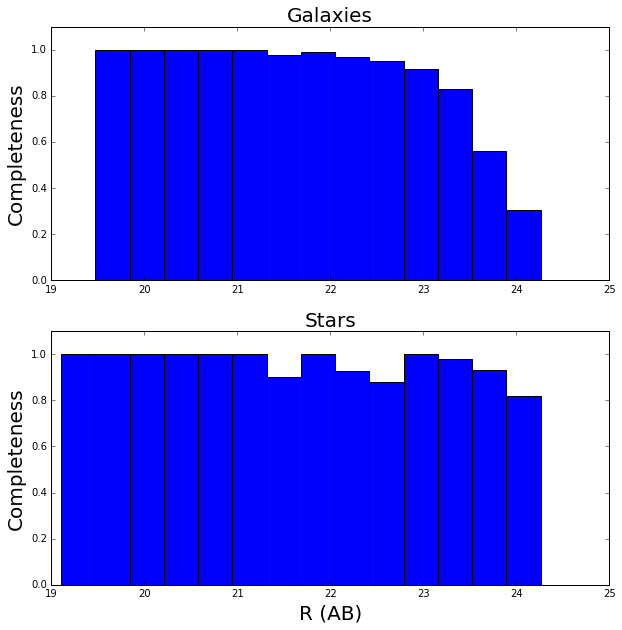

In [12]:
#same magnitude bins for detections
lo=int(min(m_gal['bestr'].min(),un_gal['bestr'].min(),m_star['bestr'].min(),un_star['bestr'].min()))-1
hi=int(max(m_gal['bestr'].max(),un_gal['bestr'].max(),m_star['bestr'].max(),un_star['bestr'].max()))+1
bins=np.linspace(lo,hi,20)
h={}
h['m_gal']= plt.hist(m_gal['bestr'],bins=bins)
h['un_gal']= plt.hist(un_gal['bestr'],bins=bins)
h['m_star']= plt.hist(m_star['bestr'],bins=bins)
h['un_star']= plt.hist(un_star['bestr'],bins=bins)
plt.close()
#plot normalizing by total counts
fig,ax=plt.subplots(2,1,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.2)
kwargs=dict(bar=dict(color='b'), text=dict(fontsize=20)) #,edgecolor='b',linewidth=2.,fill=False)
mpl.rcParams['xtick.labelsize'] = kwargs['text']['fontsize']-10
mpl.rcParams['ytick.labelsize'] = kwargs['text']['fontsize']-10
#panel 1
width= h['m_gal'][1][1:]-h['m_gal'][1][:-1]
ax[0].bar(h['m_gal'][1][:-1],h['m_gal'][0]/(h['m_gal'][0]+h['un_gal'][0]),width=width,**kwargs['bar'])
ax[0].set_ylabel("Completeness",**kwargs['text'])
ax[0].set_title("Galaxies",**kwargs['text'])
#panel 2
ax[1].bar(h['m_star'][1][:-1],h['m_star'][0]/(h['m_star'][0]+h['un_star'][0]),width=width,**kwargs['bar'])
ax[1].set_ylabel("Completeness",**kwargs['text'])
ax[1].set_title("Stars",**kwargs['text'])
ax[1].set_xlabel("R (AB)",**kwargs['text'])
for i in range(2):
    ax[i].set_ylim(0,1.1)
plt.savefig("completeness.png")

In [59]:
def row_col_plot(nrow,ncol,x,y,scatter=False,indices=None,fname='test.png',titles=None,xlim=False,ylim=False,logx=False,logy=False):
    '''x,y have shape (nrow*ncol,values,extra_axis)
    extra_axis is not necessary if plotting single line per plot otherwise extra axis 
    contains those lines'''
    assert(nrow == 1 or ncol == 1)
    assert(x.shape[0] == nrow*ncol)
    w,h=20,10
    fig,axes=plt.subplots(nrow,ncol,figsize=(w,h))
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0,wspace=0)
    cnt=0
    for i in range(len(ax)):
        if len(x.shape) == 3: #exta_axis, multiple lines per plot
            for extra in range(x.shape[2]):
                #some values may be nan or inf if some lines longer than others
                iuse= np.isfinite(x[cnt,:,extra])
                if scatter: ax[i].scatter(x[cnt,iuse,extra],y[cnt,iuse,extra])
                else: ax[i].plot(x[cnt,iuse,extra],y[cnt,iuse,extra])
        else: 
            if scatter: ax[i].scatter(x[cnt,:],y[cnt,:])
            else: ax[i].plot(x[cnt,:],y[cnt,:])
        if titles is not None: ax[i].set_title('%s' % titles[cnt])
        cnt+=1
    for i in range(len(ax)):
        if xlim: ax[i].set_xlim(xlim[0],xlim[1])
        if ylim: ax[i].set_ylim(ylim[0],ylim[1])
        if logx: ax[i].set_xscale('log')
        if logy: ax[i].set_yscale('log')
#     for i in range(len(ax)):
#         if r != range(nrow)[-1]: ax[i].xaxis.set_major_formatter(plt.NullFormatter())
#         if c != 0: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
#     plt.savefig(fname)
#     plt.close()

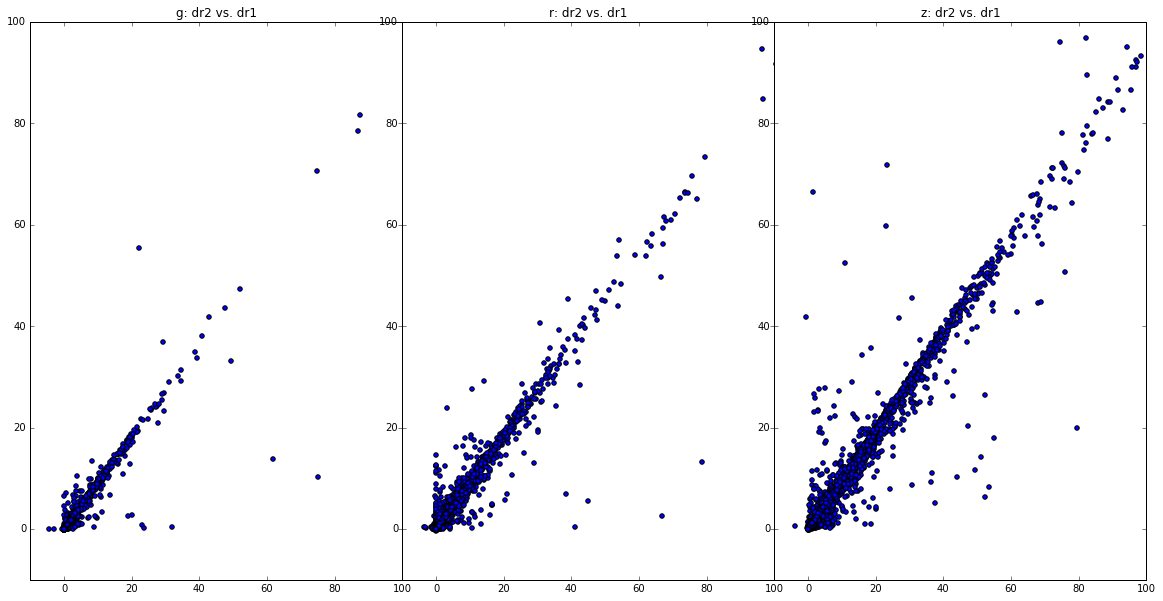

In [62]:
x=np.zeros( (3,len(data['dr1_gflux']),2) )
y=x.copy()
for i,dr1,dr2 in zip(range(3),
                     ['dr1_gflux', 'dr1_rflux', 'dr1_zflux'],
                    ['dr2_gflux', 'dr2_rflux', 'dr2_zflux']):
    x[i,:,0]= data[dr1]
#     x[i,:,1]= data[dr1] #drawing straight line
    y[i,:,0]= data[dr2]
#     y[i,:,1]= x[i,:,1]
titles=['%s: dr2 vs. dr1' % b for b in ['g','r','z']]
row_col_plot(1,3,x,y,titles=titles,scatter=True,ylim=[-10,100],xlim=[-10,100])

In [86]:
bashCommand = "date"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output = process.communicate()[0]
output

'Wed Feb 17 15:42:33 PST 2016\n'

In [5]:
subprocess.Popen(['echo','hello'])